## MUSHROOMS_CLASSIFICATION

In [60]:
import logging as lg
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
lg.basicConfig(filename="test1.log",level=lg.INFO,format='%(asctime)s %(message)s %(name)s %(levelname)s')
lg.info("we are inside the info main log")
lg.error("we are inside the error main log")
lg.warning("we are inside the warning main log")

In [62]:
try:
    lg.info("we are inside dataframe")
    data=pd.read_csv("mushrooms.csv")
    print(data)
except Exception as e:
    lg.exception(str(e))

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [63]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [64]:
try:
    lg.info("we are inside the dataset")
    data=pd.read_csv("mushrooms.csv")
    print("Number of Rows:",data.shape[0])
    print("Number of Columns:",data.shape[1])
except Exception as e:
    lg.exception(str(e))

Number of Rows: 8124
Number of Columns: 23


In [65]:
lg.info("we are checking data information")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [66]:
lg.info("we are describing the data")
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [171]:
lg.info("Checking sum of all null values")
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [172]:
def DataFrame(data):
    lg.info("We are inside DataFrame function in which it changes categorical values into numerical values by using level and coder method")
    try:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        for column in data.columns:
            data[column]=le.fit_transform(data[column])
        return data   
           
    except Exception as e:
        lg.exception(e)
        return e
DataFrame(data) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [175]:
X=data.drop(['class'],axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [176]:
Y=data['class']
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [241]:
try:
    lg.info("We are inside PCA")
    from sklearn.decomposition import PCA
    pca1=PCA(n_components=7)
    pca_fit=pca1.fit_transform(X)
    print(pca1.explained_variance_ratio_)
           
except Exception as e:
    lg.exception(e)
    print(e)

[0.33758733 0.16581098 0.12285821 0.06796611 0.05831173 0.05092539
 0.04670841]


In [242]:
pca_fit

array([[ 0.22820662, -0.34547209, -1.42442514, ...,  2.0887373 ,
         2.64591481, -1.03203624],
       [-1.93656097,  4.79691211, -3.51166783, ...,  0.55114399,
        -0.28390937,  2.55031734],
       [-1.65417317,  2.46436226, -3.88082715, ...,  1.043965  ,
        -2.05260792, -2.19086311],
       ...,
       [-1.86050705,  0.47024368,  1.19021189, ...,  0.36438338,
         0.0533683 , -2.84370836],
       [ 7.29306843, -1.25169255, -1.24197629, ..., -1.59230954,
         0.04386969, -0.31170554],
       [-4.83553281, -3.58375805, -0.11250607, ...,  0.53066395,
         1.92326412,  1.36092613]])

In [243]:

try:
    lg.info("finding the sum of 2 components of PCA")
    print(sum(pca1.explained_variance_ratio_))
except Exception as e:
    lg.exception(e)
    print(e)

0.8501681635086227


In [244]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(pca_fit,Y,test_size=0.20,random_state=42)

In [245]:
# X_train.shape

In [246]:
X_test.shape

(1625, 7)

In [247]:
# Y_test.shape

In [248]:
# Y_train.shape

## Model Training

In [249]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
svc=SVC()
svc.fit(X_train,Y_train)
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
rm=RandomForestClassifier()
rm.fit(X_train,Y_train)
gb=GradientBoostingClassifier()
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

## Prediction of test Data

In [250]:
Y_predict1=lr.predict(X_test)
Y_predict2=knn.predict(X_test)
Y_predict3=svc.predict(X_test)
Y_predict4=dt.predict(X_test)
Y_predict5=rm.predict(X_test)
Y_predict6=gb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Finding accuracy score by evaluating algorithm


In [251]:
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression",accuracy_score(Y_test,Y_predict1))
print("Accuracy of Kneighbors",accuracy_score(Y_test,Y_predict2))
print("Accuracy of SVC",accuracy_score(Y_test,Y_predict3))
print("Accuracy of DecisionTree",accuracy_score(Y_test,Y_predict4))
print("Accuracy of RandomForest",accuracy_score(Y_test,Y_predict5))
print("Accuracy of GradientBoosting",accuracy_score(Y_test,Y_predict6))

Accuracy of Logistic Regression 0.8344615384615385
Accuracy of Kneighbors 0.9833846153846154
Accuracy of SVC 0.952
Accuracy of DecisionTree 0.9784615384615385
Accuracy of RandomForest 0.9963076923076923
Accuracy of GradientBoosting 0.9384615384615385


In [252]:
Predicted=pd.DataFrame({'Models':['Logistic Regression','KNeighbors','SVC','Decision Tree','Random Forest','Gradient Boosting'],
              'Accuracy Score':[accuracy_score(Y_test,Y_predict1)*100,
                                accuracy_score(Y_test,Y_predict2)*100,
                                accuracy_score(Y_test,Y_predict3)*100,
                                accuracy_score(Y_test,Y_predict4)*100,
                                accuracy_score(Y_test,Y_predict5)*100,
                                accuracy_score(Y_test,Y_predict6)*100]})
Predicted
#accuracy score in percentage

,Models,Accuracy Score
0,Logistic Regression,83.446154
1,KNeighbors,98.338462
2,SVC,95.200000
3,Decision Tree,97.846154
4,Random Forest,99.630769
5,Gradient Boosting,93.846154


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy Score'>

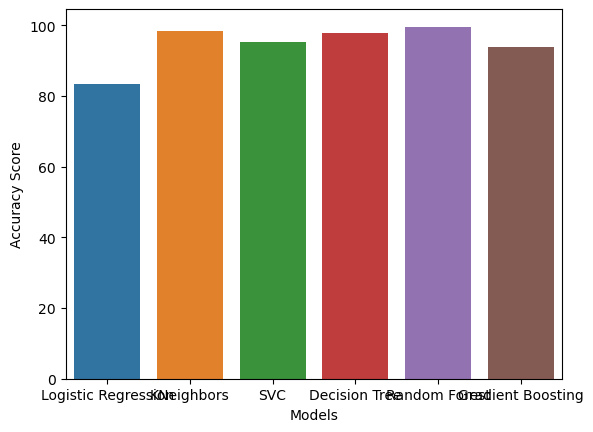

In [253]:
sns.barplot(Predicted['Models'],Predicted['Accuracy Score'])

## Save the model

In [254]:
rf_model=RandomForestClassifier()
rf_model.fit(pca_fit,Y)


RandomForestClassifier()

In [255]:
import pickle
pickle.dump(rf_model,open('decision_tree.pkl','wb'))

In [256]:
pickled_model=pickle.load(open('decision_tree.pkl','rb'))

In [257]:
# p=pickled_model.predict(pca1.transform([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5]]))

q=pickled_model.predict(([[5,2,4,1,6,1,0]]))



In [258]:
# trans=pca1.transform([[5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5]])

In [259]:
# pickled_model.predict(trans)

In [260]:
q

array([0], dtype=int64)

In [261]:
'Prediction',p

('Prediction', array([1], dtype=int64))

In [262]:
if q[0]==1:
    print("Poissonous")
else:
    print("Edible")


Edible


In [263]:
pwd

'C:\\Users\\hp'